# Health care Daata review

In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import words


### Data reading

In [2]:
DATA = pd.read_excel("healthequity.xlsx")

In [3]:
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = DATA['Rating']
positiveNegative = actualScore.map(partition) 
DATA['Rating'] = positiveNegative
print("Number of data points in our data", DATA.shape)
DATA.head(10)

Number of data points in our data (299, 3)


,User Name,Rating,Review Comments
0,Melissa Mcdonald,1,Great app to manage your medical payments. Eas...
1,Glenn Castillo,0,I REALLY wanted to work with this app. I could...
2,Jordan Hansen,1,A quick way to access my account. I really lik...
3,Daniel White,0,Your app sucks. When you have a 3 star rating ...
4,Jim O'Brien,1,Solid app that helps me to manage my HSA easily
5,Andy McIntyre,0,I am unable to upload photos of receipts. If t...
6,Renay Kuamoo,0,SUCKS!! It won't upload photos of receipts. It...
7,Benjamin Hauber,0,Worked pretty well for a while. Stopped workin...
8,Walter Bell,0,"i checked pay other amount, enter it and when ..."
9,Nathan Hintz,0,The app doesn't support uploading (or attachin...


In [4]:
DATA["Rating"].value_counts()

0    203
1     96
Name: Rating, dtype: int64

# Preprocessing Text Review

In [5]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [6]:
DATA["Review Comments"].to_string()

'0      Great app to manage your medical payments. Eas...\n1      I REALLY wanted to work with this app. I could...\n2      A quick way to access my account. I really lik...\n3      Your app sucks. When you have a 3 star rating ...\n4        Solid app that helps me to manage my HSA easily\n5      I am unable to upload photos of receipts. If t...\n6      SUCKS!! It won\'t upload photos of receipts. It...\n7      Worked pretty well for a while. Stopped workin...\n8      i checked pay other amount, enter it and when ...\n9      The app doesn\'t support uploading (or attachin...\n10     this app sucks I called their phone number the...\n11     Was not able to attach receipts or enter accou...\n12                               best hsa app out there!\n13     I can\'t up load receipts. extremely frustratin...\n14                                  great and easyto use\n15     Good: fingerprint login, can see balance and D...\n16     Both app and website looks so cool. but as soo...\n17     UI 

In [7]:







from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(DATA['Review Comments']):
    sentance = str(sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 299/299 [00:00<00:00, 1453.65it/s]


In [8]:
preprocessed_reviews[0:5]

['great app manage medical payments easy use setup future payments',
 'really wanted work app could not complete claim beiginning end app close cancel point process claims submitted wrong information thought claims saved edited later b c no point full review',
 'quick way access account really like receipt upload option',
 'app sucks star rating means sucks yes suck fix stop taking money not providing convenient service workflow awful went reimburse action drop select reimbursement account two items called full review',
 'solid app helps manage hsa easily']

In [9]:
#from sklearn.cross_validation import 
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score
from collections import Counter
import collections
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc
#from sklearn import cross_validation
from scipy.sparse import csr_matrix,hstack
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn.naive_bayes import MultinomialNB


In [10]:
X_1, X_test, y_1, y_test = train_test_split(preprocessed_reviews,DATA['Rating'], test_size=0.2, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)
print(np.asarray(X_1).shape,np.asarray(X_test).shape,np.asarray(X_tr).shape,np.asarray(X_test).shape,np.asarray(X_cv).shape)

(239,) (60,) (191,) (60,) (48,)


## Featurization

### Bag Of Words

In [11]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
BOW_Train = count_vect.fit_transform(X_tr)
BOW_test = count_vect.transform(X_test)
BOW_CV = count_vect.transform(X_cv)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(BOW_Train))
print("the shape of out text BOW vectorizer ",BOW_Train.get_shape())
print("the number of unique words ", BOW_Train.get_shape()[1])

some feature names  ['ability', 'able', 'absolute', 'absolutely', 'abysmal', 'accept', 'accepts', 'access', 'accessible', 'accessing']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (191, 912)
the number of unique words  912


### TFIDF

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=3)
TFIDF_Train = tf_idf_vect.fit_transform(X_tr)
TFIDF_Test = tf_idf_vect.transform(X_test)
TFIDF_Validation = tf_idf_vect.transform(X_cv)
print("the type of count vectorizer ",type(TFIDF_Train))
print("the shape of out text TFIDF vectorizer ",TFIDF_Train.get_shape())
print("the number of unique words including both unigrams and bigrams ", TFIDF_Train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (191, 232)
the number of unique words including both unigrams and bigrams  232


### Naive Bayes

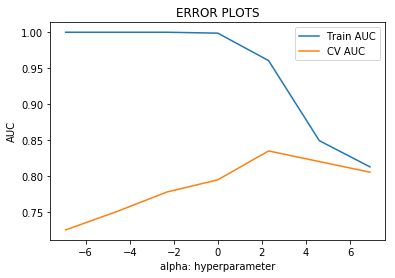

In [13]:
alph = [10**(-3),10**(-2),10**(-1),1,10,100,1000]
BOW_Train_Accuracy = []
BOW_CV_Accuracy = []
for i in alph:
    model = MultinomialNB(alpha=i)
    model.fit(BOW_Train,y_tr)
    train_pred = model.predict_log_proba(BOW_Train)[:,1]
    val_pred=model.predict_log_proba(BOW_CV)[:,1]
    BOW_Train_Accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_pred)))
    BOW_CV_Accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_pred)))

    
plt.plot(np.log(np.asarray(alph)), BOW_Train_Accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(alph)), BOW_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [14]:
best_alpha = 100

### Testing on test data

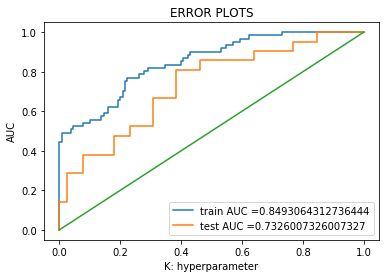

In [98]:
model = MultinomialNB(alpha=best_alpha)
model.fit(BOW_Train,y_tr)
test_pred = model.predict_log_proba(BOW_test)[:,1]
train_pred =model.predict_log_proba(BOW_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### Confusion Matrix

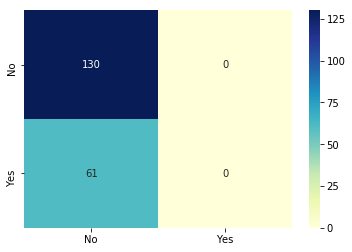

In [99]:
ytrain = model.predict(BOW_Train)
ytest = model.predict(BOW_test)
ctrain = confusion_matrix(y_tr,ytrain)
ctest = confusion_matrix(y_test,ytest)
class_label=["No","Yes"]
df = pd.DataFrame(ctrain, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")


# Logistic regression using l2 regularizer

# BOW

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

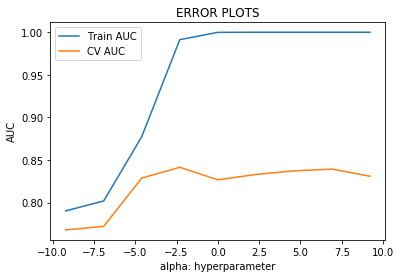

In [17]:
lamda= [10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
BOW_val_accuracy = []
BOW_train_accuracy = []
for i in lamda:
    model = LogisticRegression(C=i,penalty='l2')
    model.fit(BOW_Train,y_tr)
    val_data  = model.predict_log_proba(BOW_CV)[:,1]
    train_data = model.predict_log_proba(BOW_Train)[:,1]
    BOW_val_accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_data)))
    BOW_train_accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_data)))
plt.plot(np.log(np.asarray(lamda)), BOW_train_accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(lamda)), BOW_val_accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()
    

In [38]:
best_lambda=10**-3

### Testing on test data

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


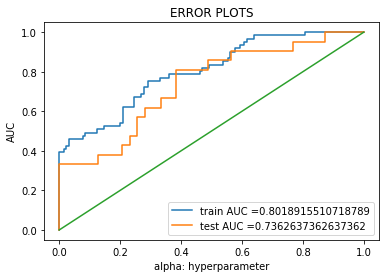

In [39]:
model = LogisticRegression(C=best_lambda,penalty='l2')
model.fit(BOW_Train,y_tr)
test_pred  = model.predict_log_proba(BOW_test)[:,1]
train_pred = model.predict_log_proba(BOW_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### Positive features

In [43]:
print(a)

[[ 5.11632807e-04  1.66502541e-03 -4.81708537e-04 -4.75343797e-04
  -4.79891132e-04 -2.89723177e-03 -9.55576993e-04  2.03844368e-03
   5.05866569e-04 -4.90549672e-04 -4.71808547e-04 -1.34785703e-03
   3.49675978e-05 -4.85096833e-04 -4.85572742e-04 -4.74711421e-04
   5.19031766e-04 -4.72071391e-04 -9.40823935e-04 -4.72828880e-04
  -9.06156582e-04  3.11710677e-05 -4.88320436e-04  5.16770704e-04
  -4.80427435e-04 -4.82377828e-04 -4.40210933e-04  5.15491165e-04
  -4.72828880e-04 -4.72828880e-04  1.02466557e-03 -1.41544375e-03
  -4.86485047e-04 -4.75052752e-04 -1.43706776e-03 -4.86485047e-04
   2.73678928e-05  6.12572798e-05 -4.68752544e-04 -9.62074171e-04
  -4.71808547e-04 -4.81708537e-04 -4.72973064e-04  5.13463913e-04
  -1.92693326e-03 -4.90525234e-04 -4.67710744e-04 -4.72548640e-04
  -2.13226057e-02 -4.86740533e-04 -9.69232459e-04 -9.47300443e-04
   5.15491165e-04 -4.79792553e-04  5.19031766e-04  5.11604705e-04
  -4.85572742e-04 -9.37709337e-04 -4.87864587e-04 -4.87181161e-04
  -4.91136

In [45]:
a = model.coef_
b= []
for i in range(191):
    if a[0][i]>0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1],reverse=True)
print(b)
print(" So the top 5 features of positive class are--")
for i in range(0,40):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i][0]],b[i][1]))

[(7, 0.0020384436762274317), (1, 0.0016650254132127434), (160, 0.001524259973082141), (30, 0.0010246655697789136), (127, 0.0005526303042197202), (16, 0.0005190317655599388), (54, 0.0005190317655599388), (97, 0.0005190317655599388), (184, 0.0005190317655599388), (111, 0.0005183257158075323), (23, 0.0005167707035669784), (94, 0.0005167707035669784), (98, 0.0005167707035669784), (104, 0.0005167707035669784), (165, 0.0005167707035669784), (185, 0.0005167707035669784), (88, 0.0005166871773363811), (150, 0.0005160812775072466), (63, 0.0005155925161247911), (27, 0.0005154911652841806), (52, 0.0005154911652841806), (188, 0.0005154911652841806), (43, 0.000513463912757506), (121, 0.000513463912757506), (0, 0.000511632807233396), (55, 0.000511604704872991), (87, 0.000511604704872991), (164, 0.0005112147157518389), (189, 0.0005112147157518389), (65, 0.0005099655029466522), (170, 0.0005080029256525633), (120, 0.0005077428951859563), (73, 0.000505985197308182), (8, 0.0005058665691553091), (134, 0.00

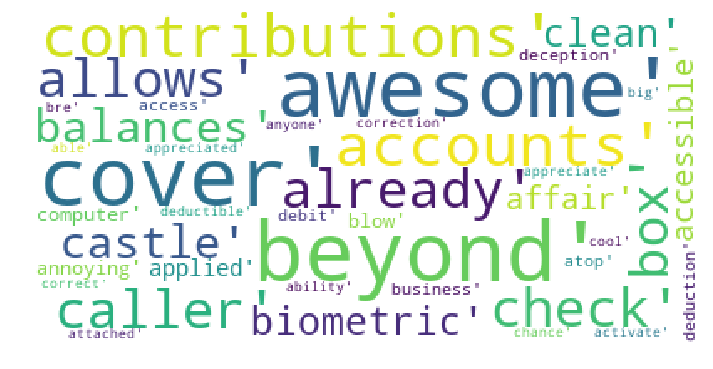

In [46]:
c=[]
for i in range(0,40):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=40,
                          max_font_size=50, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Negative features

In [47]:
a = model.coef_
b= []
for i in range(191):
    if a[0][i]<0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1])
b = b[0:100]
print(b)
print(" So the top 100 features of negative class are--")
for i in range(0,100):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i][0]],b[i][1]))

[(48, -0.021322605688536073), (5, -0.002897231767323917), (145, -0.0023639260147853697), (132, -0.0021552304038105962), (64, -0.0019331293577085342), (44, -0.001926933261278605), (143, -0.0019026066751548112), (106, -0.0018967729151001145), (171, -0.0014591923792040306), (174, -0.0014556203793941755), (117, -0.0014488117450197008), (34, -0.001437067755731893), (110, -0.001436881801638877), (176, -0.0014276771340578575), (113, -0.0014264289196090699), (139, -0.0014239005843357203), (31, -0.0014154437516344317), (146, -0.001413819485097178), (75, -0.0013822592455921194), (11, -0.0013478570323533408), (96, -0.000969973184138479), (50, -0.0009692324585377721), (72, -0.000967660256442456), (116, -0.0009648675852756681), (119, -0.000963930190513726), (138, -0.0009630738741223294), (74, -0.0009630318575917257), (39, -0.0009620741706841827), (135, -0.0009600827975185432), (130, -0.0009590028958493414), (6, -0.000955576992944814), (122, -0.0009553167483676597), (99, -0.0009548266003818348), (14

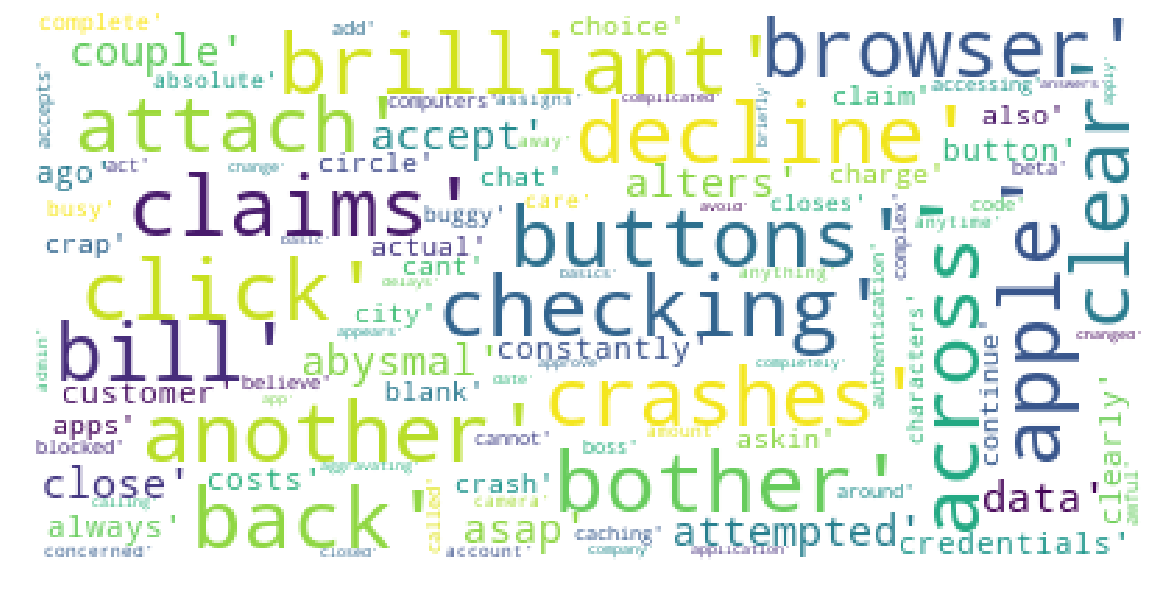

In [48]:
c=[]
for i in range(0,100):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=30, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Tfidf

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

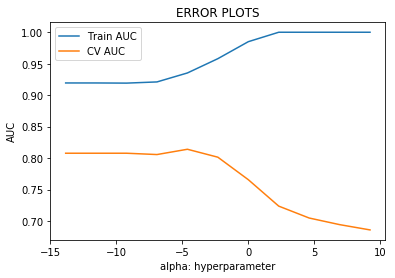

In [69]:
lamda= [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
tfidf_val_accuracy = []
tfidf_train_accuracy = []
for i in lamda:
    model = LogisticRegression(C=i,penalty='l2')
    model.fit(TFIDF_Train,y_tr)
    val_data  = model.predict_log_proba(TFIDF_Validation)[:,1]
    train_data = model.predict_log_proba(TFIDF_Train)[:,1]
    tfidf_val_accuracy.append(roc_auc_score(np.asarray(y_cv),np.asarray(val_data)))
    tfidf_train_accuracy.append(roc_auc_score(np.asarray(y_tr),np.asarray(train_data)))
plt.plot(np.log(np.asarray(lamda)), tfidf_train_accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(lamda)), tfidf_val_accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [76]:
best_lambda =10**-5

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


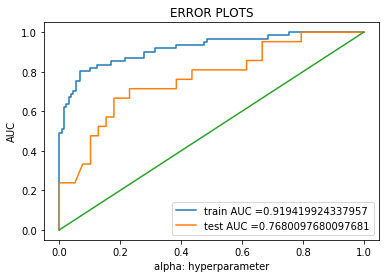

In [77]:
model = LogisticRegression(C=best_lambda,penalty='l2')
model.fit(TFIDF_Train,y_tr)
test_pred  = model.predict_log_proba(TFIDF_Test)[:,1]
train_pred = model.predict_log_proba(TFIDF_Train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_tr, train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


### confusion Matrix

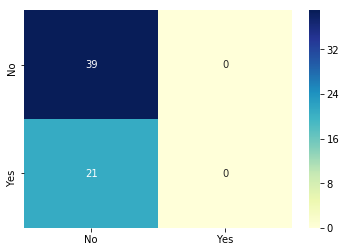

In [78]:
ytrain = model.predict(TFIDF_Train)
ytest = model.predict(TFIDF_Test)
ctrain = confusion_matrix(y_tr,ytrain)
ctest = confusion_matrix(y_test,ytest)
class_label=["No","Yes"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")


### Positive features

In [91]:
a

array([[ 3.77784319e-06, -1.14629457e-05,  7.65290080e-06,
        -5.49881873e-06, -1.98569431e-06,  1.89335341e-07,
        -5.84365376e-06, -4.64490479e-06, -4.56019465e-07,
        -7.80998073e-06, -3.70468908e-05, -4.25096766e-06,
        -8.46765793e-06, -1.38008658e-05, -7.68643628e-06,
        -2.03417506e-06, -6.82980724e-06, -3.00678133e-06,
        -5.29999223e-06, -1.13685776e-06, -1.30501842e-06,
        -1.19478927e-07, -3.95015070e-06, -3.88611026e-06,
        -2.38565815e-06, -6.44503094e-06, -4.63185688e-06,
        -4.34498776e-06, -5.96529263e-06,  1.68429684e-06,
        -2.21992163e-06, -4.51618619e-06, -4.46822395e-06,
        -4.00171533e-06, -2.23141000e-06, -1.13390494e-05,
        -5.85448551e-06, -1.06817647e-06, -1.22387176e-06,
        -1.85761784e-06, -7.25765346e-06, -6.53566939e-06,
        -4.50213212e-06, -3.22717861e-06, -3.51498133e-06,
        -1.04323966e-05,  7.02589196e-06,  2.24271816e-05,
         1.49197913e-05,  1.18504034e-06, -8.01574566e-0

In [95]:
# Please write all the code with proper documentation
a = model.coef_
b= []
for i in range(232):
    if a[0][i]>0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1],reverse=True)
print(b)
print(" So the top 50 features of positive class are--")
for i in range(0,43):
    print("feature name : %s , value : %f"%(tf_idf_vect.get_feature_names()[b[i][0]],b[i][1]))

[(69, 2.9786115560815985e-05), (47, 2.2427181550559428e-05), (48, 1.491979128466623e-05), (104, 1.2573121577950047e-05), (70, 1.2101675076096328e-05), (173, 8.896107346514325e-06), (78, 8.254565964464063e-06), (107, 7.87270770869466e-06), (172, 7.783398950781382e-06), (2, 7.652900795134548e-06), (142, 7.342506200644577e-06), (46, 7.0258919561985225e-06), (120, 6.795826765760818e-06), (68, 6.792164048015725e-06), (105, 6.6440532750431365e-06), (151, 6.110605716578718e-06), (119, 5.733587870518006e-06), (189, 5.725726052073802e-06), (115, 4.718787676715847e-06), (229, 4.3659209651363085e-06), (162, 4.144342029987748e-06), (75, 4.0296728422677404e-06), (0, 3.777843191868206e-06), (124, 3.7025567644343756e-06), (148, 3.097099014571369e-06), (58, 3.0363304217648243e-06), (204, 2.8613399386532266e-06), (214, 2.8308233247161697e-06), (212, 2.4347242126782967e-06), (157, 2.398117242487122e-06), (79, 2.1843553597091433e-06), (184, 1.7473655400388377e-06), (29, 1.6842968373465896e-06), (147, 1.6

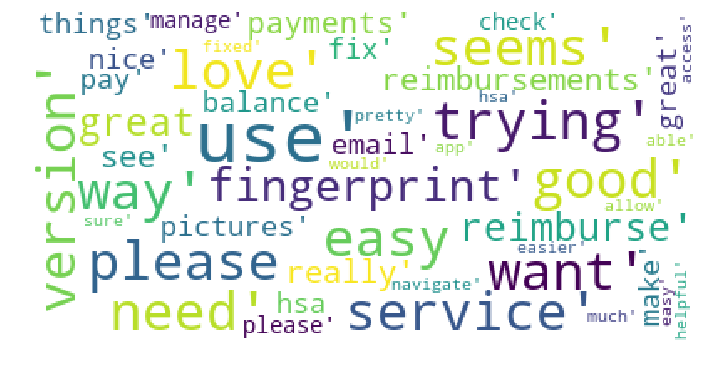

In [96]:
c=[]
for i in range(0,43):
    c.append(tf_idf_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=50,
                          max_font_size=43, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Negative features

In [94]:
len(b)

189

In [92]:
a = model.coef_
b= []
for i in range(232):
    if a[0][i]<0:
        b.append((i,a[0][i]))
b =  sorted(b,key= lambda x: x[1])
print(b)
print(" So the top 100 features of positive class are--")
for i in range(0,100):
    print("feature name : %s , value : %f"%(tf_idf_vect.get_feature_names()[b[i][0]],b[i][1]))

[(10, -3.704689077463183e-05), (126, -3.109046281548588e-05), (169, -2.807271107833298e-05), (101, -2.6305230517980053e-05), (64, -2.1892921469462908e-05), (224, -2.0296870444355415e-05), (99, -2.0092100266875837e-05), (137, -1.8963973708916124e-05), (182, -1.706117161307994e-05), (202, -1.6857020399906426e-05), (219, -1.6476807861538377e-05), (183, -1.6097980317061057e-05), (92, -1.55445290059024e-05), (190, -1.4279781387505698e-05), (13, -1.3800865800438178e-05), (222, -1.354394221328521e-05), (223, -1.354394221328521e-05), (52, -1.3229347308514257e-05), (192, -1.2129321893372373e-05), (198, -1.2054854499107037e-05), (156, -1.2039085010152012e-05), (208, -1.190744659940338e-05), (1, -1.1462945650807677e-05), (125, -1.1415232413296885e-05), (35, -1.133904938812162e-05), (201, -1.0953450725310636e-05), (62, -1.0469393589470002e-05), (45, -1.0432396625950754e-05), (218, -1.0342906878677151e-05), (127, -9.81067488334708e-06), (165, -9.679984961388323e-06), (53, -9.318254580120336e-06), (

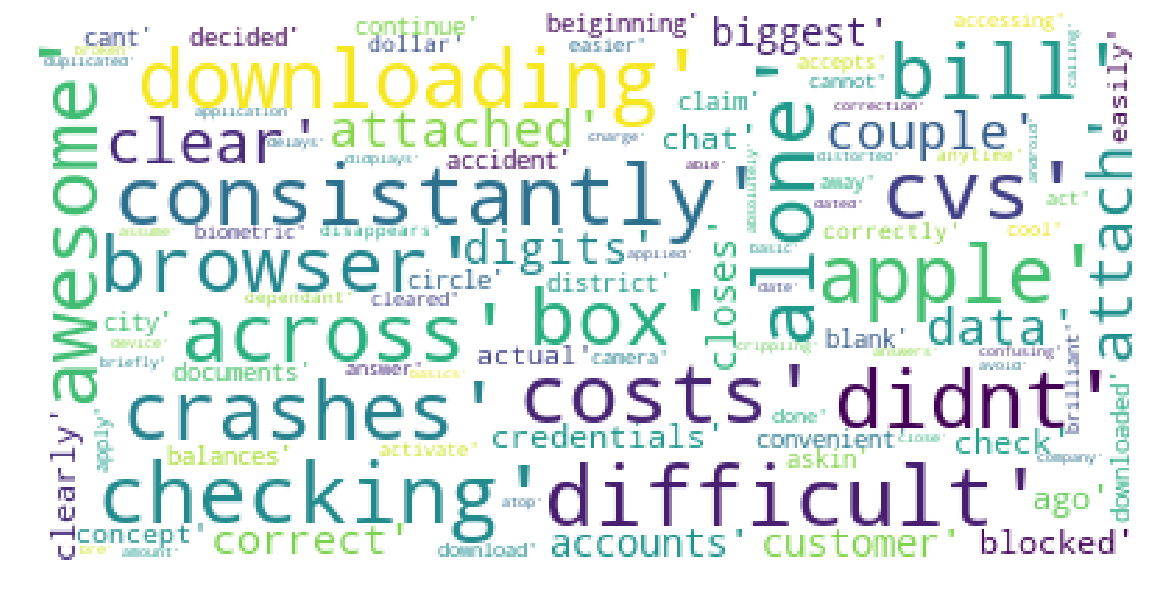

In [93]:
c=[]
for i in range(0,100):
    c.append(count_vect.get_feature_names()[b[i][0]])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=30, 
                          random_state=50
                         ).generate(str(c))

fig = plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()